## Load Dataset

In [4]:
import os
import pandas as pd
from scipy.stats import zscore
import matplotlib as matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import rankdata
from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix





import itertools

In [5]:
df = pd.read_csv("data\Occupancy.csv")
df.head().T

,0,1,2,3,4
date,2015-02-02 14:19:00,2015-02-02 14:19:59,2015-02-02 14:21:00,2015-02-02 14:22:00,2015-02-02 14:23:00
Temperature,23.7,23.718,23.73,23.7225,23.754
Humidity,26.272,26.29,26.23,26.125,26.2
Light,585.2,578.4,572.666667,493.75,488.6
CO2,749.2,760.4,769.666667,774.75,779.0
HumidityRatio,0.004764,0.004773,0.004765,0.004744,0.004767
Occupancy,1,1,1,1,1


# Check columns and types in dataset

In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [7]:
df.shape

(20560, 7)

# Cleaning the dataset

### Check for missing values

In [8]:
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

### Check for duplicates

In [9]:
df['date'].duplicated().sum() 

0

# Look at basic statistics

In [10]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


## Look at dates in dataset

In [11]:
# Convert to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Check min and max timestamps
start_date = df['date'].min()
end_date = df['date'].max()

print(f"📅 Data ranges from: {start_date} to {end_date}")
print(f"🕒 Total duration: {end_date - start_date}")


📅 Data ranges from: 2015-02-02 14:19:00 to 2015-02-18 09:19:00
🕒 Total duration: 15 days 19:00:00


In [12]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20560 entries, 0 to 20559
Series name: date
Non-Null Count  Dtype         
--------------  -----         
20560 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.8 KB


# Looking at different correlations - Answering Questions

### Occupancy Distribution

In [13]:

fig = px.histogram(
    df,
    x='Occupancy',
    nbins=2,
    histnorm='percent',
    title='Occupancy Distribution (Percentage)'
)
fig.update_layout(
    xaxis_title='Occupancy',
    yaxis_title='Percentage',
    bargap=0.2
)
fig.show()


### Compare occupancy for day-off or working day


In [14]:

# Ensure datetime format and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day_name()

# Filter for Sunday and Monday
df_filtered = df[df['day'].isin(['Sunday', 'Monday'])]

# Group by day and hour, calculate average occupancy
occupancy_by_hour = df_filtered.groupby(['day', 'hour'])['Occupancy'].mean().reset_index()

# Plot
fig = px.line(
    occupancy_by_hour,
    x='hour',
    y='Occupancy',
    color='day',
    title='Average Occupancy by Hour: Sunday vs. Monday',
    markers=True,
    labels={'hour': 'Hour of Day', 'Occupancy': 'Occupancy Rate'}
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()


### Conclusion: Sunday is day - off

## Occupancy vs Temprature

In [15]:
fig = px.box(
    df_clean,
    x='Occupancy',
    y='Temperature',
    title='Temperature Distribution by Occupancy Status (Outliers Removed)',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'Temperature': 'Temperature (°C)'}
)
fig.show()

NameError: name 'df_clean' is not defined

In [ ]:
# Convert 'date' to datetime and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour
hourly_stats = df.groupby('hour').agg({
    'Temperature': 'mean',
    'Occupancy': 'mean'  # average occupancy per hour (0 to 1)
}).reset_index()

# Create the figure
fig = go.Figure()

# Add temperature trace (left y-axis)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['Temperature'],
    name='Avg Temperature (°C)',
    mode='lines+markers',
    line=dict(color='red'),
    yaxis='y1'
))

# Add occupancy trace (right y-axis)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Average Temperature and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Avg Temperature (°C)',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Occupancy',
        side='right',
        overlaying='y',
        range=[0, 1],
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


### Compare temprature for a day off and a working day

In [ ]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract hour
df['hour'] = df['date'].dt.hour

# Filter for Sunday and hours between 8 and 17 inclusive
df_sunday_workhours = df[
    (df['date'].dt.day_name() == 'Sunday') &
    (df['hour'] >= 8) &
    (df['hour'] <= 17)
]

# Calculate average temperature
average_temp_sunday_workhours = df_sunday_workhours['Temperature'].mean()
print(f"🌡️ Average Temperature on Sunday (08:00–17:00): {average_temp_sunday_workhours:.2f} °C")

# Filter for Monday and hours between 8 and 17 inclusive
df_monday_workhours = df[
    (df['date'].dt.day_name() == 'Monday') &
    (df['hour'] >= 8) &
    (df['hour'] <= 17)
]

# Calculate average temperature
average_temp_monday_workhours = df_monday_workhours['Temperature'].mean()
print(f"🌡️ Average Temperature on Monday (08:00–17:00): {average_temp_monday_workhours:.2f} °C")


🌡️ Average Temperature on Sunday (08:00–17:00): 20.67 °C
🌡️ Average Temperature on Monday (08:00–17:00): 21.62 °C


## Occupancy vs CO₂

In [ ]:

fig = px.box(
    filtered_df,
    x='Occupancy',
    y='CO2',
    title='CO₂ Distribution by Occupancy Status',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'CO2': 'CO₂ (ppm)'}
)
fig.show()

### Average CO₂ and Occupancy

In [ ]:

# Convert 'date' to datetime and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour
hourly_stats = df.groupby('hour').agg({
    'CO2': 'mean',
    'Occupancy': 'mean'  # average occupancy per hour (0 to 1)
}).reset_index()

# Create the figure
fig = go.Figure()

# Add CO2 trace (left y-axis)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['CO2'],
    name='Avg CO₂ (ppm)',
    mode='lines+markers',
    line=dict(color='green'),
    yaxis='y1'
))

# Add occupancy trace (right y-axis)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Average CO₂ and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Avg CO₂ (ppm)',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Occupancy',
        side='right',
        overlaying='y',
        range=[0, 1],
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


### Compare CO₂ for a day off and a working day

In [ ]:
# Filter work hours for Sunday
df_sun_work = df[
    (df['day'] == 'Sunday') &
    (df['hour'] >= 8) & (df['hour'] <= 17)
]
avg_co2_sun = df_sun_work['CO2'].mean()
print(f"🌿 Average CO₂ on Sunday (08:00–17:00): {avg_co2_sun:.2f} ppm")

# Filter work hours for Monday
df_mon_work = df[
    (df['day'] == 'Monday') &
    (df['hour'] >= 8) & (df['hour'] <= 17)
]
avg_co2_mon = df_mon_work['CO2'].mean()
print(f"🌿 Average CO₂ on Monday (08:00–17:00): {avg_co2_mon:.2f} ppm")


🌿 Average CO₂ on Sunday (08:00–17:00): 536.98 ppm
🌿 Average CO₂ on Monday (08:00–17:00): 1110.60 ppm


## Occupancy vs Humidity

In [ ]:
fig = px.box(
    df,
    x='Occupancy',
    y='Humidity',
    title='Humidity Distribution by Occupancy Status',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'Humidity': 'Relative Humidity (%)'}
)
fig.show()

In [ ]:
# Group by hour for Humidity and Occupancy
hourly_humidity = df.groupby('hour').agg({
    'Humidity': 'mean',
    'Occupancy': 'mean'
}).reset_index()

# Create figure
fig = go.Figure()

# Add Humidity trace (left Y-axis)
fig.add_trace(go.Scatter(
    x=hourly_humidity['hour'],
    y=hourly_humidity['Humidity'],
    name='Avg Humidity (%)',
    mode='lines+markers',
    line=dict(color='orange'),
    yaxis='y1'
))

# Add Occupancy trace (right Y-axis)
fig.add_trace(go.Bar(
    x=hourly_humidity['hour'],
    y=hourly_humidity['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Average Humidity and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(title='Avg Humidity (%)', side='left'),
    yaxis2=dict(title='Avg Occupancy', side='right', overlaying='y', range=[0, 1]),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


## Occupancy vs HumidityRatio

In [ ]:
fig = px.box(
    df,
    x='Occupancy',
    y='HumidityRatio',
    title='Humidity Ratio Distribution by Occupancy Status',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'HumidityRatio': 'Humidity Ratio (kg water/kg dry air)'}
)
fig.show()

In [ ]:
# Group by hour for HumidityRatio and Occupancy
hourly_ratio = df.groupby('hour').agg({
    'HumidityRatio': 'mean',
    'Occupancy': 'mean'
}).reset_index()

# Create figure
fig = go.Figure()

# Add HumidityRatio trace (left Y-axis)
fig.add_trace(go.Scatter(
    x=hourly_ratio['hour'],
    y=hourly_ratio['HumidityRatio'],
    name='Avg Humidity Ratio (kg/kg)',
    mode='lines+markers',
    line=dict(color='purple'),
    yaxis='y1'
))

# Add Occupancy trace (right Y-axis)
fig.add_trace(go.Bar(
    x=hourly_ratio['hour'],
    y=hourly_ratio['Occupancy'],
    name='Avg Occupancy',
    opacity=0.3,
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Average Humidity Ratio and Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(title='Avg Humidity Ratio (kg/kg)', side='left'),
    yaxis2=dict(title='Avg Occupancy', side='right', overlaying='y', range=[0, 1]),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()


## Occupancy vs light

In [ ]:

fig = px.box(
    df_no_outliers,
    x='Occupancy',
    y='Light',
    title='Light Distribution by Occupancy Status (Daytime Only, Outliers Removed)',
    labels={'Occupancy': 'Occupancy (0 = No, 1 = Yes)', 'Light': 'Light'}
)
fig.show()

In [ ]:

# Ensure datetime format and extract hour
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

# Group by hour and calculate mean Light and Occupancy
hourly_stats = df.groupby('hour').agg({
    'Light': 'mean',
    'Occupancy': 'mean'  
}).reset_index()

# Create figure
fig = go.Figure()

# Add Occupancy (background area)
fig.add_trace(go.Bar(
    x=hourly_stats['hour'],
    y=hourly_stats['Occupancy'],
    name='Occupancy Rate',
    opacity=0.3,
    marker_color='lightblue',
    yaxis='y2'
))

# Add Light (line plot)
fig.add_trace(go.Scatter(
    x=hourly_stats['hour'],
    y=hourly_stats['Light'],
    name='Avg Light',
    mode='lines+markers',
    line=dict(color='orange'),
    yaxis='y1'
))

# Update layout with two y-axes
fig.update_layout(
    title='Average Light Levels with Occupancy by Hour of Day',
    xaxis=dict(title='Hour of Day', dtick=1),
    yaxis=dict(
        title='Average Light',
        side='left'
    ),
    yaxis2=dict(
        title='Occupancy Rate',
        overlaying='y',
        side='right',
        range=[0, 1],
        showgrid=False
    ),
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

fig.show()


### Check for real Sunset distribution in europe

#### sunrise : 7-8 , sunset: 17-18

### Check Light distribution for a day off (sunday)

In [ ]:

# Ensure datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for Sunday and make a copy
df_sunday = df[df['date'].dt.day_name() == 'Sunday'].copy()

# Extract hour
df_sunday['hour'] = df_sunday['date'].dt.hour

# Group by hour and calculate average light
hourly_light_sunday = df_sunday.groupby('hour')['Light'].mean().reset_index()

# Plot
fig = px.line(
    hourly_light_sunday,
    x='hour',
    y='Light',
    title='Average Light Levels by Hour on Sunday',
    markers=True
)
fig.update_layout(
    xaxis_title='Hour of Day',
    yaxis_title='Average Light',
    xaxis=dict(dtick=1),
    template='plotly_white'
)
fig.show()


In [ ]:
# Filter only Sunday
df_sunday = df[df['date'].dt.day_name() == 'Sunday']

# Calculate average light on Sunday
average_light_sunday = df_sunday['Light'].mean()
print(f"🌞 Average Light on Sunday: {average_light_sunday:.2f}")

# Filter only Monday
df_monday = df[df['date'].dt.day_name() == 'Monday']

# Calculate average light on Monday
average_light_monday = df_monday['Light'].mean()
print(f"🌞 Average Light on Monday: {average_light_monday:.2f}")


🌞 Average Light on Sunday: 38.74
🌞 Average Light on Monday: 172.32


# Check outliers

### Select only float-type columns (continuous numeric data)

In [ ]:
numeric_cols = df.select_dtypes(include=['float32', 'float64']).columns
numeric_cols 

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

#### Temprature:

In [ ]:
col = 'Temperature'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"🔹 IQR outliers in '{col}': {len(iqr_outliers)}")

if not iqr_outliers.empty:
    occ_0 = iqr_outliers[iqr_outliers['Occupancy'] == 0]
    occ_1 = iqr_outliers[iqr_outliers['Occupancy'] == 1]
    print(f"    - Occupancy = 0 → {len(occ_0)} outliers")
    print(f"    - Occupancy = 1 → {len(occ_1)} outliers")
    
    df_iqr_outliers = iqr_outliers[[col, 'Occupancy']].copy()
    df_iqr_outliers["column"] = col
    df_iqr_outliers["method"] = "IQR"
else:
    df_iqr_outliers = pd.DataFrame()

🔹 IQR outliers in 'Temperature': 519
    - Occupancy = 0 → 260 outliers
    - Occupancy = 1 → 259 outliers


#### Humidity:

In [ ]:
col = 'Humidity'

# IQR Method
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"🔹 IQR outliers in '{col}': {len(iqr_outliers)}")

# Optional: collect into a DataFrame
if not iqr_outliers.empty:
    df_iqr_outliers = iqr_outliers[[col]].copy()
    df_iqr_outliers["column"] = col
    df_iqr_outliers["method"] = "IQR"
else:
    df_iqr_outliers = pd.DataFrame()


🔹 IQR outliers in 'Humidity': 0

#### Light:

In [ ]:
col = 'Light'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"🔹 IQR outliers in '{col}': {len(iqr_outliers)}")

if not iqr_outliers.empty:
    occ_0 = iqr_outliers[iqr_outliers['Occupancy'] == 0]
    occ_1 = iqr_outliers[iqr_outliers['Occupancy'] == 1]
    print(f"    - Occupancy = 0 → {len(occ_0)} outliers")
    print(f"    - Occupancy = 1 → {len(occ_1)} outliers")
    
    df_iqr_outliers = iqr_outliers[[col, 'Occupancy']].copy()
    df_iqr_outliers["column"] = col
    df_iqr_outliers["method"] = "IQR"
else:
    df_iqr_outliers = pd.DataFrame()


🔹 IQR outliers in 'Light': 183
    - Occupancy = 0 → 3 outliers
    - Occupancy = 1 → 180 outliers


#### CO2:

In [ ]:
col = 'CO2'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"🔹 IQR outliers in '{col}': {len(iqr_outliers)}")

if not iqr_outliers.empty:
    occ_0 = iqr_outliers[iqr_outliers['Occupancy'] == 0]
    occ_1 = iqr_outliers[iqr_outliers['Occupancy'] == 1]
    print(f"    - Occupancy = 0 → {len(occ_0)} outliers")
    print(f"    - Occupancy = 1 → {len(occ_1)} outliers")
    
    df_iqr_outliers = iqr_outliers[[col, 'Occupancy']].copy()
    df_iqr_outliers["column"] = col
    df_iqr_outliers["method"] = "IQR"
else:
    df_iqr_outliers = pd.DataFrame()

🔹 IQR outliers in 'CO2': 1449
    - Occupancy = 0 → 766 outliers
    - Occupancy = 1 → 683 outliers


#### Humidity Ratio:

In [ ]:
col = 'HumidityRatio'

# IQR Method
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"🔹 IQR outliers in '{col}': {len(iqr_outliers)}")

# Optional: collect into a DataFrame
if not iqr_outliers.empty:
    df_iqr_outliers = iqr_outliers[[col]].copy()
    df_iqr_outliers["column"] = col
    df_iqr_outliers["method"] = "IQR"
else:
    df_iqr_outliers = pd.DataFrame()


🔹 IQR outliers in 'HumidityRatio': 0


## Correlation

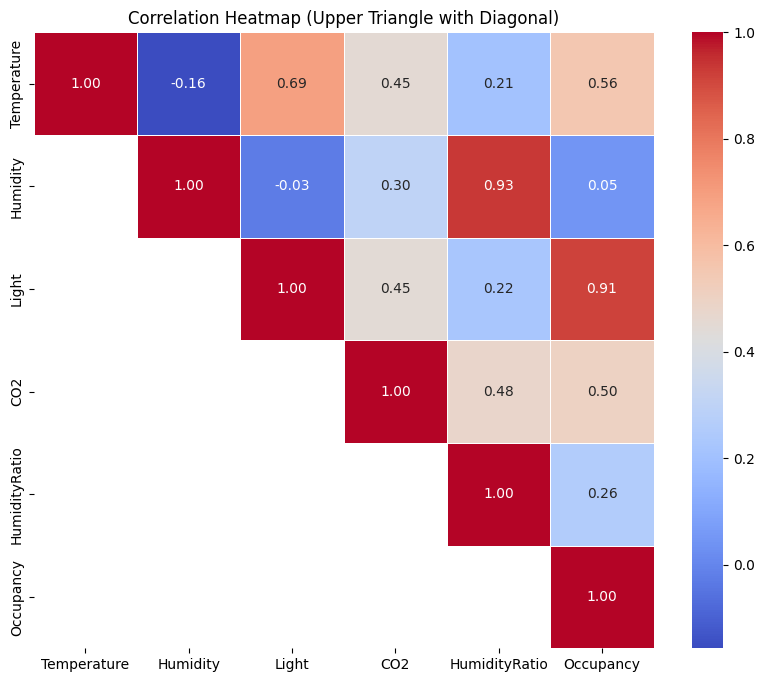

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
mask = np.tril(np.ones_like(corr, dtype=bool), k=-1)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Upper Triangle with Diagonal)')
plt.show()

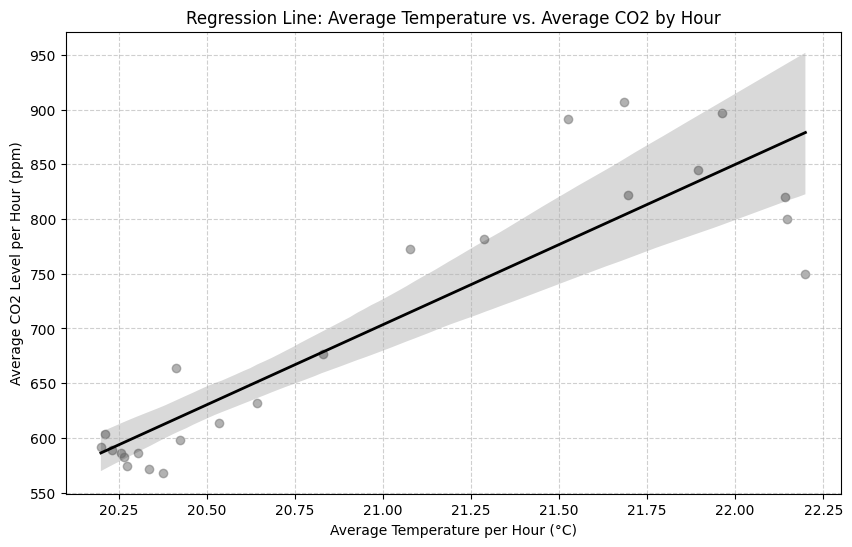

In [ ]:

df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour

hourly_avg_data = df.groupby('hour')[['Temperature', 'CO2']].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.regplot(
    data=hourly_avg_data,
    x='Temperature',
    y='CO2',
    color='black',
    scatter_kws={'alpha':0.6, 'color':'gray'},
    line_kws={'color':'black', 'linewidth':2}
)

plt.title('Regression Line: Average Temperature vs. Average CO2 by Hour')
plt.xlabel('Average Temperature per Hour (°C)')
plt.ylabel('Average CO2 Level per Hour (ppm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

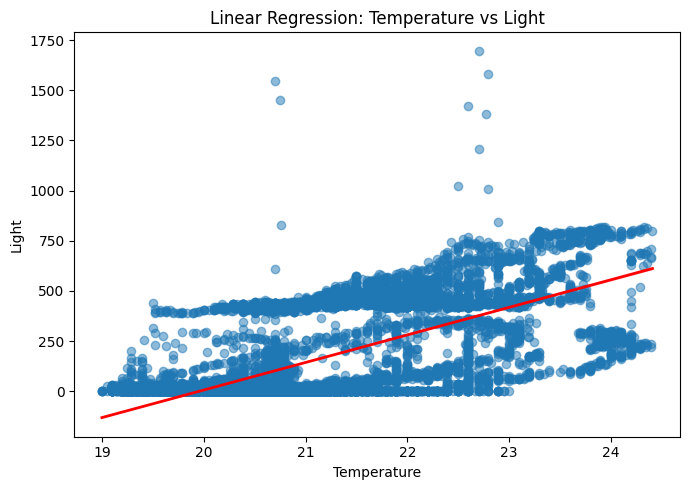

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x='Temperature', y='Light', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
plt.title('Linear Regression: Temperature vs Light')
plt.xlabel('Temperature')
plt.ylabel('Light')
plt.tight_layout()
plt.show()

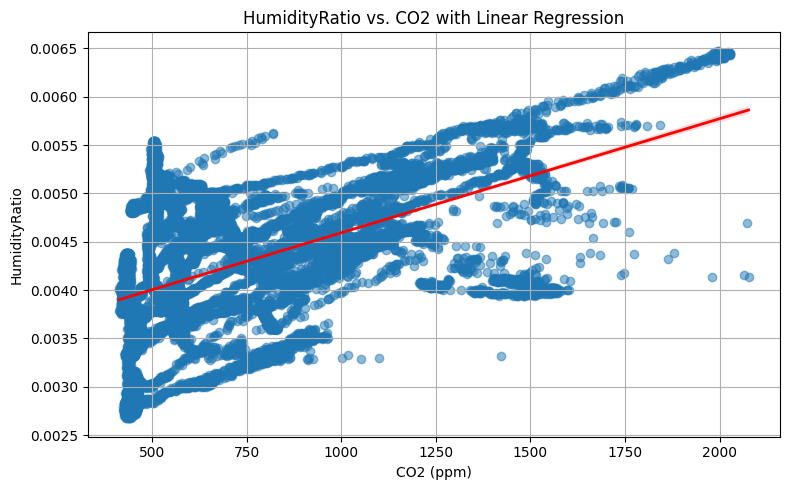

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='CO2', y='HumidityRatio', scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
plt.title('HumidityRatio vs. CO2 with Linear Regression')
plt.xlabel('CO2 (ppm)')
plt.ylabel('HumidityRatio')
plt.grid(True)
plt.tight_layout()
plt.show()

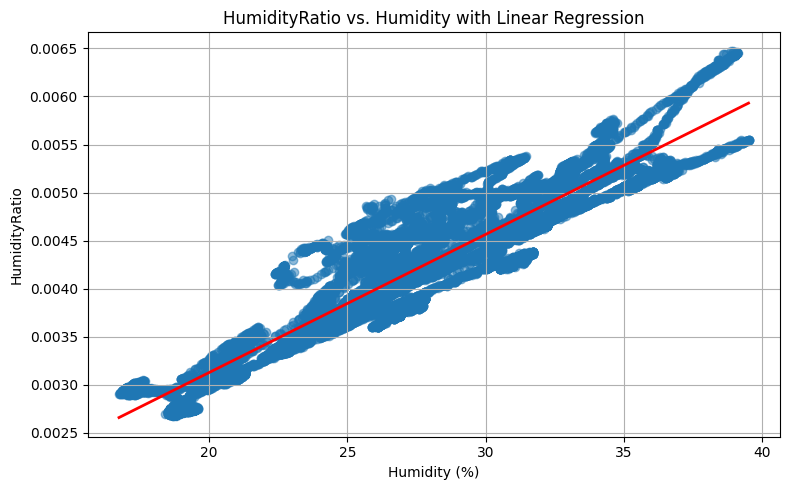

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Humidity', y='HumidityRatio', scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
plt.title('HumidityRatio vs. Humidity with Linear Regression')
plt.xlabel('Humidity (%)')
plt.ylabel('HumidityRatio')
plt.grid(True)
plt.tight_layout()
plt.show()

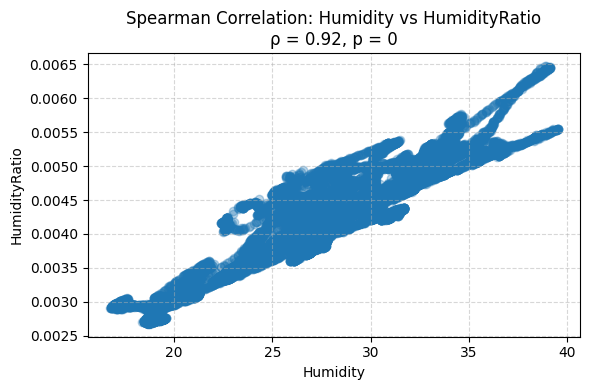

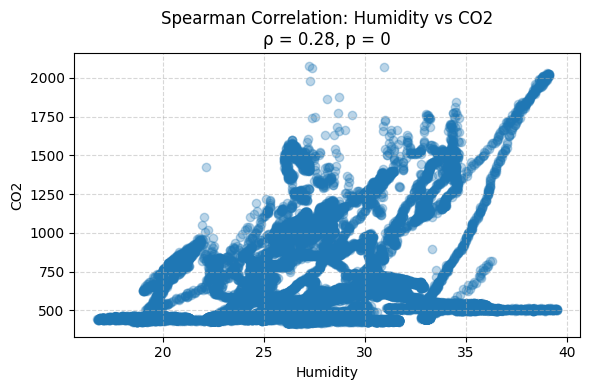

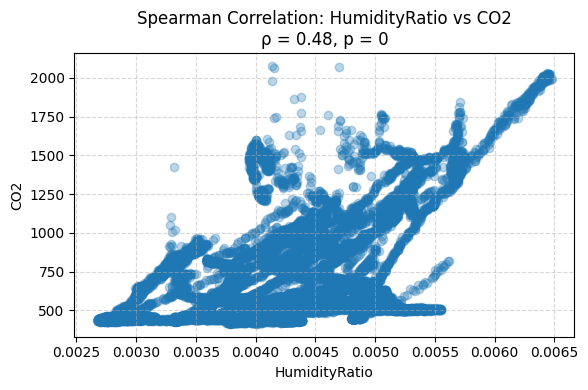

In [ ]:
# Select olumns
numeric_cols = ['Humidity' , 'HumidityRatio', 'CO2']

# Generate scatterplots for all pairs of numeric features, excluding self-pairs and filtering by p-value
for col1, col2 in itertools.combinations(numeric_cols, 2):
    coef, p = spearmanr(df[col1], df[col2])
    if p < 0.01:  # Only plot highly significant correlations
        plt.figure(figsize=(6, 4))
        plt.scatter(df[col1], df[col2], alpha=0.3)
        plt.title(f"Spearman Correlation: {col1} vs {col2}\n"
                  f"ρ = {coef:.2f}, p = {p:.2g}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

### Analyze Relationships

In [ ]:
# Calculate Spearman correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
spearman_corr = df[numeric_cols].corr(method='spearman')

# Filter pairs with correlation above 0.6
high_corr_pairs = []
for col1 in spearman_corr.columns:
    for col2 in spearman_corr.index:
        if col1 != col2 and spearman_corr.loc[col1, col2] > 0.6:
            high_corr_pairs.append((col1, col2, spearman_corr.loc[col1, col2]))

# Remove duplicates (e.g., (A, B) and (B, A))
unique_high_corr_pairs = []
seen = set()
for col1, col2, corr in high_corr_pairs:
    if (col2, col1) not in seen:
        unique_high_corr_pairs.append((col1, col2, corr))
        seen.add((col1, col2))

# Display results
print("Features with Spearman correlation > 0.6:")
for col1, col2, corr in unique_high_corr_pairs:
    print(f"{col1} vs {col2}: ρ = {corr:.2f}")

Features with Spearman correlation > 0.6:
Temperature vs Light: ρ = 0.63
Temperature vs CO2: ρ = 0.61
Humidity vs HumidityRatio: ρ = 0.92
Light vs Occupancy: ρ = 0.83


### Define Logical Combinations

Investigate relationships between correlated variables and define meaningful ranges or thresholds for combined variables.

In [ ]:
# 1. Temperature vs Light
df['temp_bin'] = pd.cut(df['Temperature'], bins=[15,20,25])
df['light_bin'] = pd.cut(df['Light'], bins=[100,300,500,700])
grouped_temp_light = df.groupby(['temp_bin','light_bin'])['Occupancy'].mean().reset_index()
print("Temperature vs Light Occupancy Patterns:")
print(grouped_temp_light)

# 2. Temperature vs CO2
df['temp_bin'] = pd.cut(df['Temperature'], bins=[15,20,25])
df['co2_bin'] = pd.cut(df['CO2'], bins=[400,600,800,1000])
grouped_temp_co2 = df.groupby(['temp_bin','co2_bin'])['Occupancy'].mean().reset_index()
print("\nTemperature vs CO2 Occupancy Patterns:")
print(grouped_temp_co2)

# 3. Humidity vs HumidityRatio
df['humidity_bin'] = pd.cut(df['Humidity'], bins=[20,40])  
df['ratio_bin'] = pd.cut(df['HumidityRatio'], bins=[0.001,0.003,0.005,0.007])  
grouped_hum_ratio = df.groupby(['humidity_bin','ratio_bin'])['Occupancy'].mean().reset_index()
print("\nHumidity vs HumidityRatio Occupancy Patterns:")
print(grouped_hum_ratio)


Temperature vs Light Occupancy Patterns:
   temp_bin   light_bin  Occupancy
0  (15, 20]  (100, 300]   0.029412
1  (15, 20]  (300, 500]   0.862069
2  (15, 20]  (500, 700]        NaN
3  (20, 25]  (100, 300]   0.012516
4  (20, 25]  (300, 500]   0.916074
5  (20, 25]  (500, 700]   0.926413

Temperature vs CO2 Occupancy Patterns:
   temp_bin      co2_bin  Occupancy
0  (15, 20]   (400, 600]   0.004888
1  (15, 20]   (600, 800]   0.042254
2  (15, 20]  (800, 1000]        NaN
3  (20, 25]   (400, 600]   0.064683
4  (20, 25]   (600, 800]   0.255186
5  (20, 25]  (800, 1000]   0.648524

Humidity vs HumidityRatio Occupancy Patterns:
  humidity_bin       ratio_bin  Occupancy
0     (20, 40]  (0.001, 0.003]   0.000000
1     (20, 40]  (0.003, 0.005]   0.217793
2     (20, 40]  (0.005, 0.007]   0.380855


C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\778794279.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\778794279.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\778794279.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Try Binnning Features Using pd.qcut()

In [ ]:
import numpy as np
import pandas as pd

def grid_quality(df, f1, f2, q1, q2, target='Occupancy', min_n_flag=20):
    s = df[[f1, f2, target]].dropna().copy()
    s[f'{f1}_bin'] = pd.qcut(s[f1], q=q1, duplicates='drop')
    s[f'{f2}_bin'] = pd.qcut(s[f2], q=q2, duplicates='drop')

    out = (s.groupby([f'{f1}_bin', f'{f2}_bin'])[target]
             .agg(occ_rate='mean', n='size')
             .reset_index())

    # simple uncertainty proxy for a proportion
    out['se'] = np.sqrt(np.clip(out['occ_rate'] * (1 - out['occ_rate']) / out['n'], 0, None))
    # quick quality label (tweak thresholds if you want)
    out['quality'] = np.where(out['n'] < min_n_flag, 'low n',
                        np.where(out['se'] > 0.08, 'noisy', 'good'))
    return out.round({'occ_rate': 3, 'se': 3})

# 1) Temperature vs Light
print("Temperature vs Light Occupancy Patterns (with quality):")
print(grid_quality(df, 'Temperature', 'Light', q1=3, q2=3))

# 2) Temperature vs CO2
print("\nTemperature vs CO2 Occupancy Patterns (with quality):")
print(grid_quality(df, 'Temperature', 'CO2', q1=3, q2=3))

# 3) Humidity vs HumidityRatio
print("\nHumidity vs HumidityRatio Occupancy Patterns (with quality):")
print(grid_quality(df, 'Humidity', 'HumidityRatio', q1=2, q2=4))


Temperature vs Light Occupancy Patterns (with quality):
    Temperature_bin        Light_bin  occ_rate     n     se quality
0   (18.999, 20.39]   (-0.001, 31.0]     0.000  7176  0.000    good
1   (18.999, 20.39]  (31.0, 1697.25]     0.195   430  0.019    good
2   (20.39, 21.167]   (-0.001, 31.0]     0.000  5190  0.000    good
3   (20.39, 21.167]  (31.0, 1697.25]     0.615   917  0.016    good
4  (21.167, 24.408]   (-0.001, 31.0]     0.001  1422  0.001    good
5  (21.167, 24.408]  (31.0, 1697.25]     0.756  5425  0.006    good

Temperature vs CO2 Occupancy Patterns (with quality):
    Temperature_bin           CO2_bin  occ_rate     n     se quality
0   (18.999, 20.39]  (412.749, 499.5]     0.008  4265  0.001    good
1   (18.999, 20.39]    (499.5, 714.0]     0.012  2321  0.002    good
2   (18.999, 20.39]   (714.0, 2076.5]     0.022  1020  0.005    good
3   (20.39, 21.167]  (412.749, 499.5]     0.012  1959  0.002    good
4   (20.39, 21.167]    (499.5, 714.0]     0.097  2483  0.006    good

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\1152960740.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\1152960740.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\1152960740.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Define a combined logical feature

In [ ]:
df['Comfort_Index'] = (
    (df['Temperature'].between(20,25)) &
    (df['Light'].between(300,700))
).astype(int)

df['Temp_CO2_Index'] = (
    (df['Temperature'].between(20,25)) &
    (df['CO2'].between(800,1000))
).astype(int)

df['Humidity_Index'] = (
    (df['Humidity'].between(20,40)) &
    (df['HumidityRatio'].between(0.005,0.007))
).astype(int)

### Random Forest with K‑Fold CV

In [ ]:
X = df[['Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio']]  # add or drop features as needed
y = df['Occupancy']  # target

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestRegressor(random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='r2')

print("Random Forest CV R² per fold:", cv_scores_rf)
print("Random Forest Average R²:", np.mean(cv_scores_rf))


Random Forest CV R² per fold: [0.97206396 0.96232971 0.97024805 0.9665766  0.95846474]
Random Forest Average R²: 0.9659366111865803


- An R² of ~96.5% means model explains about 96.5% of the variance in occupancy.
- The spread is small (0.957–0.97).
- This stability means the model generalizes well across different splits.

=> No obvious signs of overfitting 

#### Feature Importance
##### See which predictors Random Forest thinks are most important:

In [ ]:
rf.fit(X, y)
importances = rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.3f}")

print("\n")
X_hum = df[['Humidity', 'HumidityRatio']]
rf.fit(X_hum, y)
for f, imp in zip(X_hum.columns, rf.feature_importances_):
    print(f, ":", round(imp, 4))


Temperature: 0.012
Light: 0.955
CO2: 0.016
Humidity: 0.009
HumidityRatio: 0.009


Humidity : 0.462
HumidityRatio : 0.538


#### We can drop one of the humidities since they are both contributing half.

- We can drop HumidityRatio.

- Best minimal interpretable model:
    - Light + Comfort_Index + Temp_CO₂_Index + Humidity
    - This gets you R² ≈ 0.956 (almost full model).

### Test Random Forest with and without HumidityRatio

In [ ]:
# Model with HumidityRatio
X_full = df[['Temperature', 'Light', 'CO2', 'Humidity', 'HumidityRatio']]
y = df['Occupancy']
cv_scores_full = cross_val_score(RandomForestRegressor(random_state=42), X_full, y, cv=5, scoring='r2')
print("Model with HumidityRatio - Avg CV R²:", np.mean(cv_scores_full))

# Model without HumidityRatio
X_reduced = df[['Temperature', 'Light', 'CO2', 'Humidity']]
cv_scores_reduced = cross_val_score(RandomForestRegressor(random_state=42), X_reduced, y, cv=5, scoring='r2')
print("Model without HumidityRatio - Avg CV R²:", np.mean(cv_scores_reduced))

Model with HumidityRatio - Avg CV R²: 0.8325523307755873
Model without HumidityRatio - Avg CV R²: 0.8382438426626916


### Drop HumidityRatio from the DataFrame

In [ ]:
df = df.drop(columns=['HumidityRatio'])

### Conclusion:
#### - Random Forest handled correlated features well, showing no signs of overfitting or performance loss.
#### - Logical, interpretable features like Comfort_Index preserved high predictive accuracy (R² ≈ 0.82), and combining it with Light and Humidity nearly matched full-model performance (R² ≈ 0.956).
#### - Therefore, correlations did not harm performance, and engineered features provided a strong, explainable alternative to raw data.

### Random Forest

In [ ]:
y = df['Occupancy']
features = ['Temperature', 'Humidity', 'Light', 'CO2']
X = df[features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Running 5-Fold Cross-Validation with R2 scoring...")
cv_scores_r2 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')

print("\nRandom Forest Regressor CV R2 per fold:")
print(cv_scores_r2)
print(f"\nRandom Forest Regressor Average R2: {np.mean(cv_scores_r2):.4f}")

features = ['Temperature', 'Humidity', 'CO2']
X = df[features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Running 5-Fold Cross-Validation with R2 scoring (without Light)...")
cv_scores_r2 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')

print("\nRandom Forest Regressor CV R2 per fold (without Light):")
print(cv_scores_r2)
print(f"\nRandom Forest Regressor Average R2 (without Light): {np.mean(cv_scores_r2):.4f}")

Running 5-Fold Cross-Validation with R2 scoring...

Random Forest Regressor CV R2 per fold:
[0.96962208 0.96263635 0.96829743 0.96848356 0.95761836]

Random Forest Regressor Average R2: 0.9653
Running 5-Fold Cross-Validation with R2 scoring (without Light)...

Random Forest Regressor CV R2 per fold (without Light):
[0.93834884 0.92650625 0.92589091 0.92967842 0.9189967 ]

Random Forest Regressor Average R2 (without Light): 0.9279


In [ ]:
y = df['Occupancy']

features = ['Temperature', 'Humidity', 'Light']
X = df[features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Running 5-Fold Cross-Validation with R2 scoring (with Light, without CO2)...")
cv_scores_r2 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')

print("\nRandom Forest Regressor CV R2 per fold (with Light, without CO2):")
print(cv_scores_r2)
print(f"\nRandom Forest Regressor Average R2 (with Light, without CO2): {np.mean(cv_scores_r2):.4f}")

Running 5-Fold Cross-Validation with R2 scoring (with Light, without CO2)...

Random Forest Regressor CV R2 per fold (with Light, without CO2):
[0.96816533 0.95791006 0.9667011  0.96657761 0.95456855]

Random Forest Regressor Average R2 (with Light, without CO2): 0.9628


### Decision Tree

In [ ]:
y = df['Occupancy']

# Features with Light
features = ['Temperature', 'Humidity', 'Light', 'CO2']
X = df[features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

print("Running 5-Fold Cross-Validation with R2 scoring (Decision Tree)...")
cv_scores_r2 = cross_val_score(dt_regressor, X, y, cv=kf, scoring='r2')

print("\nDecision Tree Regressor CV R2 per fold:")
print(cv_scores_r2)
print(f"\nDecision Tree Regressor Average R2: {np.mean(cv_scores_r2):.4f}")

# Features without Light
features = ['Temperature', 'Humidity', 'CO2']
X = df[features]

print("\nRunning 5-Fold Cross-Validation with R2 scoring (Decision Tree, without Light)...")
cv_scores_r2 = cross_val_score(dt_regressor, X, y, cv=kf, scoring='r2')

print("\nDecision Tree Regressor CV R2 per fold (without Light):")
print(cv_scores_r2)
print(f"\nDecision Tree Regressor Average R2 (without Light): {np.mean(cv_scores_r2):.4f}")

Running 5-Fold Cross-Validation with R2 scoring (Decision Tree)...

Decision Tree Regressor CV R2 per fold:
[0.94679089 0.94880344 0.95056973 0.94487771 0.91959021]

Decision Tree Regressor Average R2: 0.9421

Running 5-Fold Cross-Validation with R2 scoring (Decision Tree, without Light)...

Decision Tree Regressor CV R2 per fold (without Light):
[0.88237986 0.90973238 0.87976421 0.88562125 0.87245344]

Decision Tree Regressor Average R2 (without Light): 0.8860


### LDA

In [ ]:
# Target
y = df['Occupancy']

# Features with Light
features = ['Temperature', 'Humidity', 'Light', 'CO2']
X = df[features]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lda = LinearDiscriminantAnalysis()

print("Running 5-Fold Cross-Validation with Accuracy scoring (LDA)...")
cv_scores_acc = cross_val_score(lda, X, y, cv=kf, scoring='accuracy')

print("\nLDA CV Accuracy per fold:")
print(cv_scores_acc)
print(f"\nLDA Average Accuracy: {np.mean(cv_scores_acc):.4f}")

# Features without Light
features = ['Temperature', 'Humidity', 'CO2']
X = df[features]

print("\nRunning 5-Fold Cross-Validation with Accuracy scoring (LDA, without Light)...")
cv_scores_acc = cross_val_score(lda, X, y, cv=kf, scoring='accuracy')

print("\nLDA CV Accuracy per fold (without Light):")
print(cv_scores_acc)
print(f"\nLDA Average Accuracy (without Light): {np.mean(cv_scores_acc):.4f}")

Running 5-Fold Cross-Validation with Accuracy scoring (LDA)...

LDA CV Accuracy per fold:
[0.98784047 0.98565175 0.98832685 0.98492218 0.9790856 ]

LDA Average Accuracy: 0.9852

Running 5-Fold Cross-Validation with Accuracy scoring (LDA, without Light)...

LDA CV Accuracy per fold (without Light):
[0.82198444 0.82611868 0.82855058 0.83146887 0.81687743]

LDA Average Accuracy (without Light): 0.8250


In [ ]:

y = df['Occupancy']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- Light + CO2 ---
features = ['Light', 'CO2']
X = df[features]

print("Running 5-Fold Cross-Validation with R2 scoring (Light + CO2)...")
cv_scores_r2 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
print("\nRandom Forest Regressor CV R2 per fold (Light + CO2):")
print(cv_scores_r2)
print(f"\nAverage R2 (Light + CO2): {np.mean(cv_scores_r2):.4f}")

# --- Light + Temperature ---
features = ['Light', 'Temperature']
X = df[features]

print("\nRunning 5-Fold Cross-Validation with R2 scoring (Light + Temperature)...")
cv_scores_r2 = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
print("\nRandom Forest Regressor CV R2 per fold (Light + Temperature):")
print(cv_scores_r2)
print(f"\nAverage R2 (Light + Temperature): {np.mean(cv_scores_r2):.4f}")

Running 5-Fold Cross-Validation with R2 scoring (Light + CO2)...

Random Forest Regressor CV R2 per fold (Light + CO2):
[0.95570118 0.9380804  0.9562474  0.95995591 0.93168094]

Average R2 (Light + CO2): 0.9483

Running 5-Fold Cross-Validation with R2 scoring (Light + Temperature)...

Random Forest Regressor CV R2 per fold (Light + Temperature):
[0.95941162 0.94722471 0.95492414 0.95634715 0.93812435]

Average R2 (Light + Temperature): 0.9512


In [ ]:
y = df['Occupancy']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# --- Light + CO2 ---
features = ['Light', 'CO2']
X = df[features]

print("Running 5-Fold Cross-Validation with Accuracy scoring (Light + CO2)...")
cv_scores_acc = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
print("\nRandom Forest Classifier CV Accuracy per fold (Light + CO2):")
print(cv_scores_acc)
print(f"\nAverage Accuracy (Light + CO2): {np.mean(cv_scores_acc):.4f}")

# --- Light + Temperature ---
features = ['Light', 'Temperature']
X = df[features]

print("\nRunning 5-Fold Cross-Validation with Accuracy scoring (Light + Temperature)...")
cv_scores_acc = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
print("\nRandom Forest Classifier CV Accuracy per fold (Light + Temperature):")
print(cv_scores_acc)
print(f"\nAverage Accuracy (Light + Temperature): {np.mean(cv_scores_acc):.4f}")

Running 5-Fold Cross-Validation with Accuracy scoring (Light + CO2)...

Random Forest Classifier CV Accuracy per fold (Light + CO2):
[0.99100195 0.98735409 0.99002918 0.99148833 0.98589494]

Average Accuracy (Light + CO2): 0.9892

Running 5-Fold Cross-Validation with Accuracy scoring (Light + Temperature)...

Random Forest Classifier CV Accuracy per fold (Light + Temperature):
[0.99148833 0.98832685 0.9895428  0.99173152 0.98711089]

Average Accuracy (Light + Temperature): 0.9896


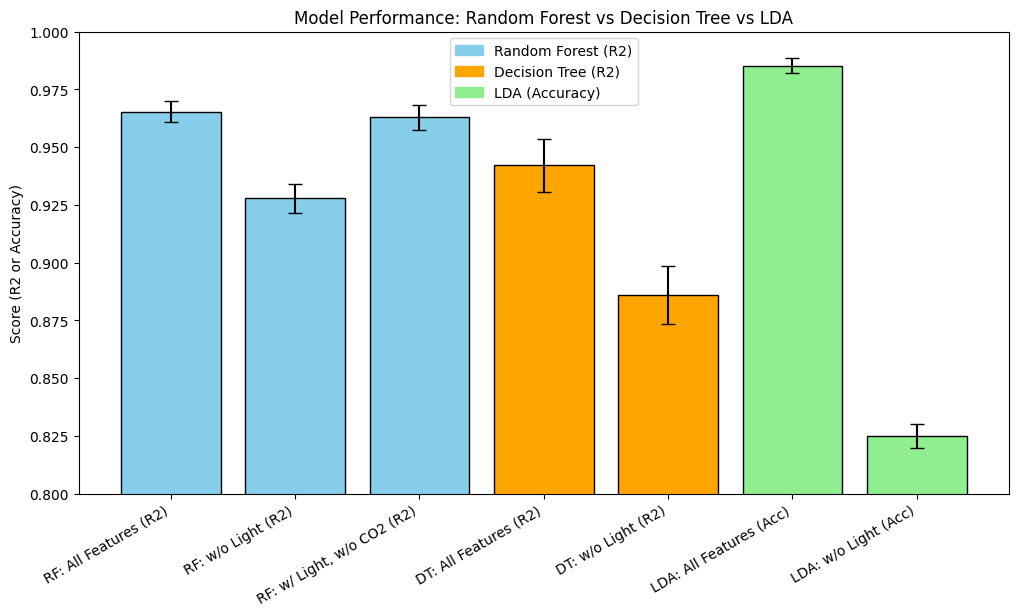

In [ ]:

y = df['Occupancy']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

# === Random Forest Regressor ===
feature_sets_rf = {
    "RF: All Features (R2)": ['Temperature', 'Humidity', 'Light', 'CO2'],
    "RF: w/o Light (R2)": ['Temperature', 'Humidity', 'CO2'],
    "RF: w/ Light, w/o CO2 (R2)": ['Temperature', 'Humidity', 'Light']
}

for name, features in feature_sets_rf.items():
    X = df[features]
    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results[name] = (np.mean(scores), np.std(scores), "RF")

# === Decision Tree Regressor ===
feature_sets_dt = {
    "DT: All Features (R2)": ['Temperature', 'Humidity', 'Light', 'CO2'],
    "DT: w/o Light (R2)": ['Temperature', 'Humidity', 'CO2']
}

for name, features in feature_sets_dt.items():
    X = df[features]
    model = DecisionTreeRegressor(random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results[name] = (np.mean(scores), np.std(scores), "DT")

# === LDA Classifier ===
feature_sets_lda = {
    "LDA: All Features (Acc)": ['Temperature', 'Humidity', 'Light', 'CO2'],
    "LDA: w/o Light (Acc)": ['Temperature', 'Humidity', 'CO2']
}

for name, features in feature_sets_lda.items():
    X = df[features]
    model = LinearDiscriminantAnalysis()
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = (np.mean(scores), np.std(scores), "LDA")

labels = list(results.keys())
means = [results[label][0] for label in labels]
stds = [results[label][1] for label in labels]
models = [results[label][2] for label in labels]

colors = []
for m in models:
    if m == "RF":
        colors.append("skyblue")   
    elif m == "DT":
        colors.append("orange")   
    else:
        colors.append("lightgreen") 

plt.figure(figsize=(12,6))
plt.bar(labels, means, yerr=stds, capsize=5, color=colors, edgecolor='black')

plt.ylabel("Score (R2 or Accuracy)")
plt.title("Model Performance: Random Forest vs Decision Tree vs LDA")
plt.ylim(0.8,1) 
plt.xticks(rotation=30, ha="right")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='skyblue', label='Random Forest (R2)')
orange_patch = mpatches.Patch(color='orange', label='Decision Tree (R2)')
green_patch = mpatches.Patch(color='lightgreen', label='LDA (Accuracy)')
plt.legend(handles=[blue_patch, orange_patch, green_patch])

plt.show()

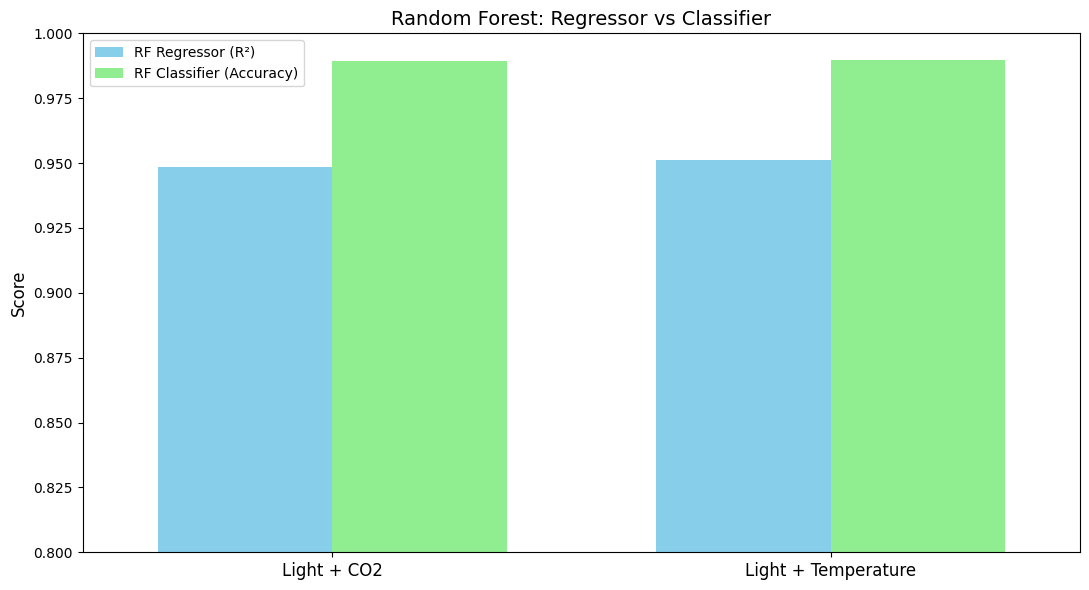

In [ ]:
y = df['Occupancy']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

feature_sets = {
    "Light + CO2": ['Light', 'CO2'],
    "Light + Temperature": ['Light', 'Temperature']
}

rf_r2_scores = []
rf_acc_scores = []

for features in feature_sets.values():
    X = df[features]
    
    rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
    r2 = cross_val_score(rf_reg, X, y, cv=kf, scoring='r2')
    rf_r2_scores.append(np.mean(r2))
    
    rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    acc = cross_val_score(rf_clf, X, y, cv=kf, scoring='accuracy')
    rf_acc_scores.append(np.mean(acc))

x = np.arange(len(feature_sets))
width = 0.35

plt.figure(figsize=(11,6))
plt.bar(x - width/2, rf_r2_scores, width=width, color='skyblue', label='RF Regressor (R²)')
plt.bar(x + width/2, rf_acc_scores, width=width, color='lightgreen', label='RF Classifier (Accuracy)')

plt.xticks(x, list(feature_sets.keys()), fontsize=12)
plt.xlim(-0.5, len(feature_sets)-0.5)  
plt.ylim(0.8, 1)
plt.ylabel("Score", fontsize=12)
plt.title("Random Forest: Regressor vs Classifier", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


#### Train and test random splits

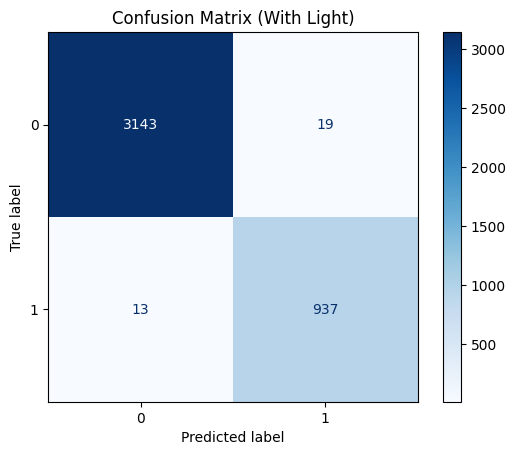

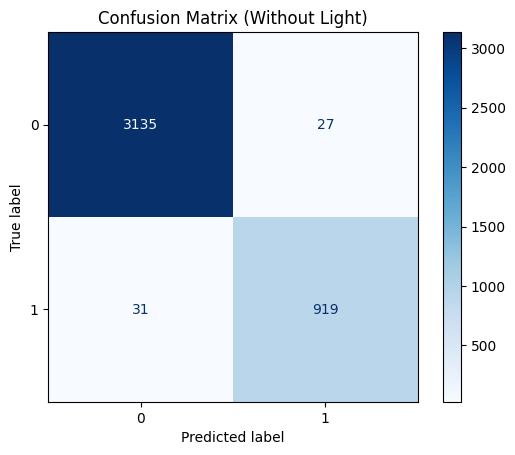

WITH LIGHT feature:
 precision       0.993188
recall          0.993142
f1-score        0.993155
support      4112.000000
dtype: float64

WITHOUT LIGHT feature:
 precision       0.985434
recall          0.985457
f1-score        0.985433
support      4112.000000
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Helper function ---
def evaluate_random_splits(df, features, target='Occupancy', n_runs=5, test_size=0.2, random_state=None, plot_cm=False, label=""):
    metrics_list = []
    last_cm = None
    last_model = None
    last_y_test, last_y_pred = None, None

    for i in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(
            df[features], df[target], 
            test_size=test_size, 
            random_state=(random_state+i if random_state else None),
            stratify=df[target]
        )

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        metrics_list.append(report['weighted avg'])  # store precision/recall/F1

        # keep last split for confusion matrix
        last_model = model
        last_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
        last_y_test, last_y_pred = y_test, y_pred

    if plot_cm and last_cm is not None:
        disp = ConfusionMatrixDisplay(confusion_matrix=last_cm, display_labels=last_model.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix ({label})")
        plt.show()

    return pd.DataFrame(metrics_list)

# --- Features sets ---
features_with_light = ['Temperature', 'Humidity', 'CO2', 'Light']  # With Light
features_without_light = ['Temperature', 'Humidity', 'CO2']        # Without Light

# --- Run evaluation ---
results_with_light = evaluate_random_splits(df, features_with_light, n_runs=5, plot_cm=True, label="With Light")
results_without_light = evaluate_random_splits(df, features_without_light, n_runs=5, plot_cm=True, label="Without Light")

print("WITH LIGHT feature:\n", results_with_light.mean())
print("\nWITHOUT LIGHT feature:\n", results_without_light.mean())


### Training with time-based splits

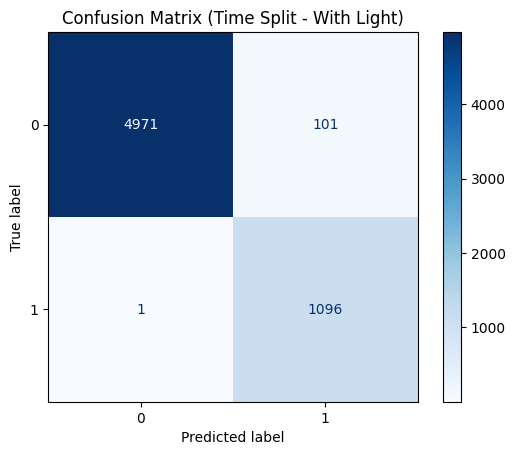

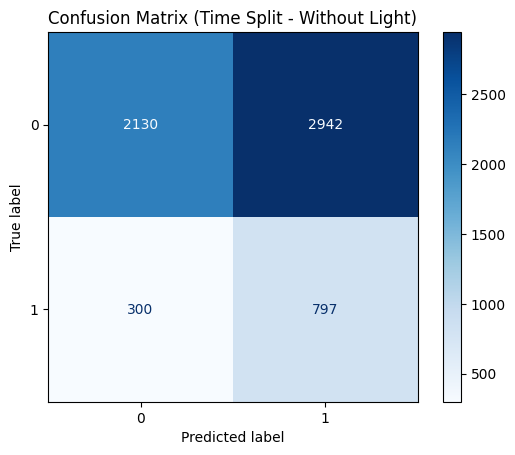

TIME-BASED SPLIT (WITH LIGHT):
    precision    recall  f1-score  support
0    0.98483  0.983466  0.983744   6169.0

TIME-BASED SPLIT (WITHOUT LIGHT):
    precision    recall  f1-score  support
0   0.758577  0.474469  0.525484   6169.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Time-based split evaluation ---
def evaluate_time_split(df, features, target='Occupancy', train_size=0.7, plot_cm=False, label=""):
    """
    Splits dataset chronologically: first train_size% for training, remainder for testing.
    Assumes df has a datetime index or a timestamp column.
    """
    # If timestamp column exists, sort by it; otherwise just use index order
    if "date" in df.columns or "timestamp" in df.columns:
        sort_col = "date" if "date" in df.columns else "timestamp"
        df_sorted = df.sort_values(by=sort_col)
    else:
        df_sorted = df.sort_index()

    n_train = int(len(df_sorted) * train_size)

    train = df_sorted.iloc[:n_train]
    test  = df_sorted.iloc[n_train:]

    X_train, y_train = train[features], train[target]
    X_test, y_test   = test[features], test[target]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # optional: plot confusion matrix
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix (Time Split - {label})")
        plt.show()

    return pd.DataFrame([report['weighted avg']])

# --- Feature sets ---
features_with_light = ['Temperature', 'Humidity', 'CO2', 'Light']
features_without_light = ['Temperature', 'Humidity', 'CO2']

# --- Run time-based evaluation ---
results_time_with_light = evaluate_time_split(df, features_with_light, plot_cm=True, label="With Light")
results_time_without_light = evaluate_time_split(df, features_without_light, plot_cm=True, label="Without Light")

print("TIME-BASED SPLIT (WITH LIGHT):\n", results_time_with_light)
print("\nTIME-BASED SPLIT (WITHOUT LIGHT):\n", results_time_without_light)


### Testing CO₂+Light and Temp+Light

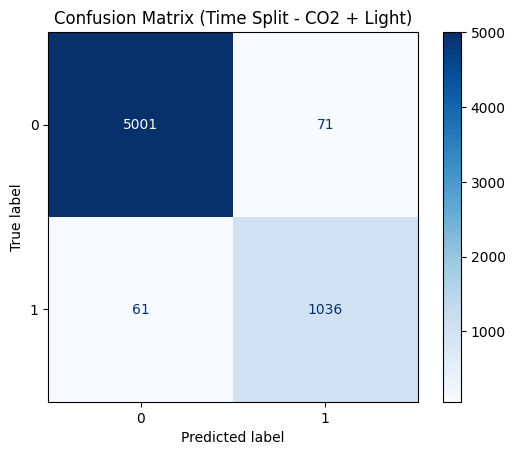

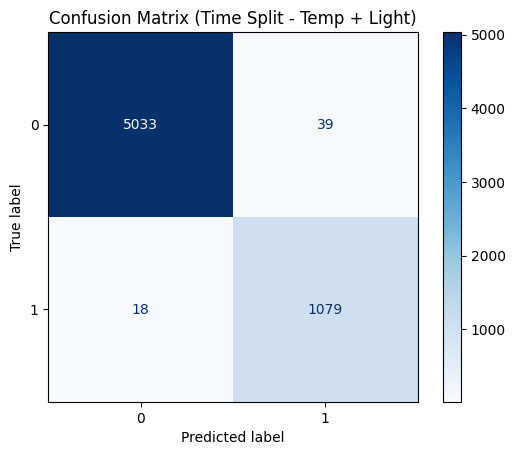

   precision    recall  f1-score  support         model
0   0.984830  0.983466  0.983744   6169.0   All + Light
0   0.758577  0.474469  0.525484   6169.0      No Light
0   0.978687  0.978603  0.978641   6169.0   CO2 + Light
0   0.990867  0.990760  0.990794   6169.0  Temp + Light


C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\74362083.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\74362083.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\74362083.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



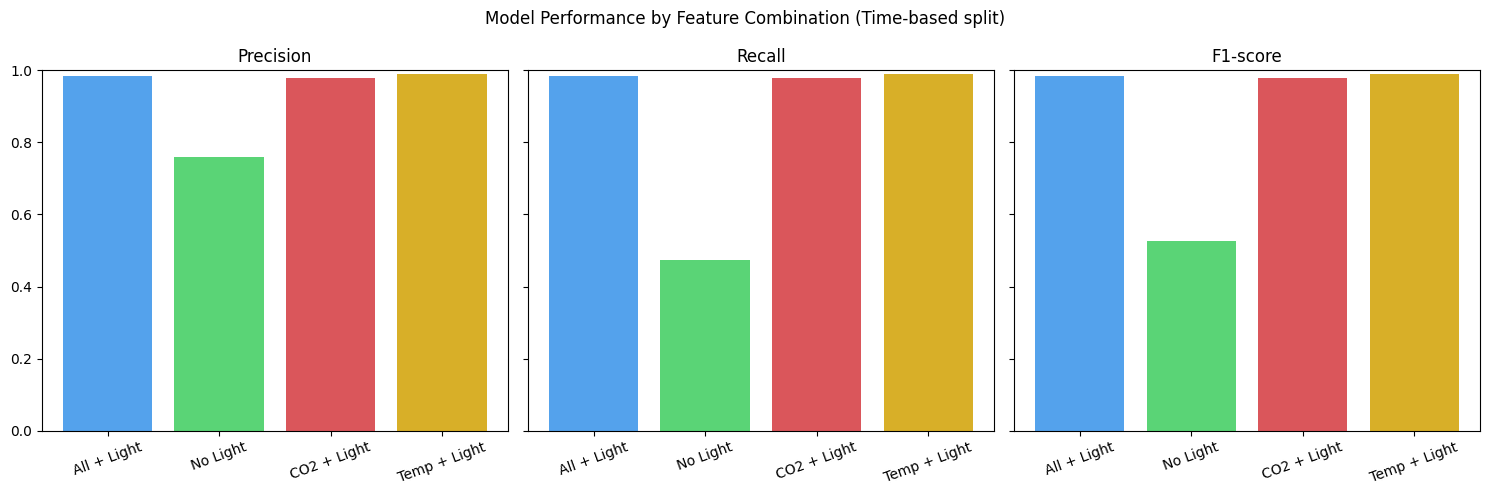

In [ ]:
import matplotlib.pyplot as plt

# --- Feature subsets ---
features_co2_light = ['CO2', 'Light']
features_temp_light = ['Temperature', 'Light']

# --- Evaluate with confusion matrices ---
res_co2_light = evaluate_time_split(df, features_co2_light, plot_cm=True, label="CO2 + Light")
res_temp_light = evaluate_time_split(df, features_temp_light, plot_cm=True, label="Temp + Light")

# Collect results into one DataFrame
results_compare = pd.concat([
    results_time_with_light.assign(model="All + Light"),
    results_time_without_light.assign(model="No Light"),
    res_co2_light.assign(model="CO2 + Light"),
    res_temp_light.assign(model="Temp + Light")
])

print(results_compare)

# --- Plot results ---
metrics = ["precision", "recall", "f1-score"]

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
colors = ["#54A2EC","#5AD476","#DA565B","#D8AF28"]

for i, metric in enumerate(metrics):
    axes[i].bar(results_compare["model"], results_compare[metric], color=colors)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylim(0,1)
    axes[i].set_xticklabels(results_compare["model"], rotation=20)

plt.suptitle("Model Performance by Feature Combination (Time-based split)")
plt.tight_layout()
plt.show()


### Trying without Light or CO2

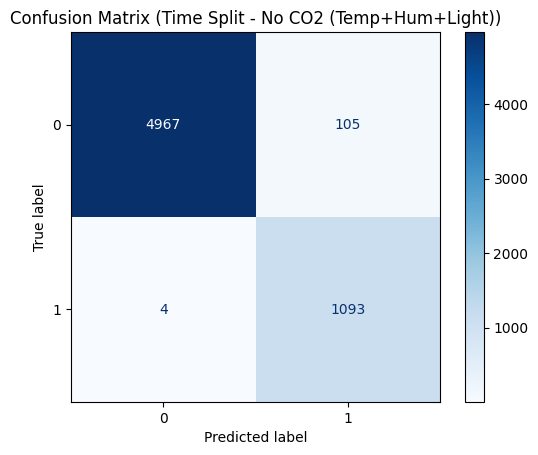

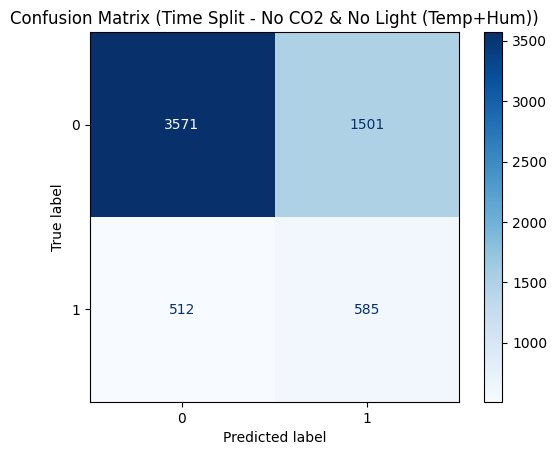

   precision    recall  f1-score  support                         model
0   0.984830  0.983466  0.983744   6169.0                   All + Light
0   0.758577  0.474469  0.525484   6169.0                      No Light
0   0.983753  0.982331  0.982631   6169.0       No CO2 (Temp+Hum+Light)
0   0.768946  0.673691  0.706760   6169.0  No CO2 & No Light (Temp+Hum)


C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\2858989278.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\2858989278.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\inbal\AppData\Local\Temp\ipykernel_18512\2858989278.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



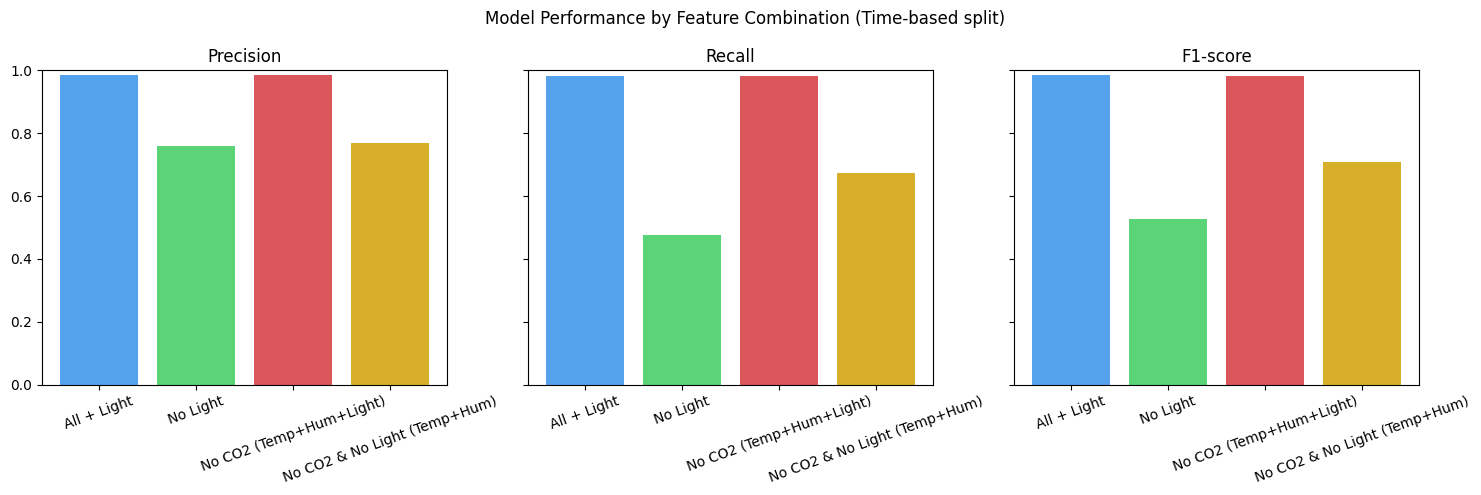

In [ ]:
# --- Feature subsets ---
features_no_co2 = ['Temperature', 'Humidity', 'Light']        # without CO2
features_no_co2_light = ['Temperature', 'Humidity']           # without CO2 and Light

# --- Evaluate with confusion matrices ---
res_no_co2 = evaluate_time_split(df, features_no_co2, plot_cm=True, label="No CO2 (Temp+Hum+Light)")
res_no_co2_light = evaluate_time_split(df, features_no_co2_light, plot_cm=True, label="No CO2 & No Light (Temp+Hum)")

# Collect results into one DataFrame
results_compare = pd.concat([
    results_time_with_light.assign(model="All + Light"),
    results_time_without_light.assign(model="No Light"),
    res_no_co2.assign(model="No CO2 (Temp+Hum+Light)"),
    res_no_co2_light.assign(model="No CO2 & No Light (Temp+Hum)")
])

print(results_compare)

# --- Plot results ---
metrics = ["precision", "recall", "f1-score"]

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
colors = ["#54A2EC","#5AD476","#DA565B","#D8AF28"]

for i, metric in enumerate(metrics):
    axes[i].bar(results_compare["model"], results_compare[metric], color=colors)
    axes[i].set_title(metric.capitalize())
    axes[i].set_ylim(0,1)
    axes[i].set_xticklabels(results_compare["model"], rotation=20)

plt.suptitle("Model Performance by Feature Combination (Time-based split)")
plt.tight_layout()
plt.show()


### Let's add Time as a feature:

In [ ]:
# 1) Add time features to df
import numpy as np
import pandas as pd

# Ensure datetime column exists and is parsed
time_col = 'date' if 'date' in df.columns else ('timestamp' if 'timestamp' in df.columns else None)
assert time_col is not None, "No 'date' or 'timestamp' column found in df."

df[time_col] = pd.to_datetime(df[time_col])

# Minutes since midnight (e.g., 03:04 -> 184)
df['minutes'] = df[time_col].dt.hour * 60 + df[time_col].dt.minute

# Cyclic encoding (recommended)
df['minutes_sin'] = np.sin(2 * np.pi * df['minutes'] / 1440.0)
df['minutes_cos'] = np.cos(2 * np.pi * df['minutes'] / 1440.0)


### Train with time-based split

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_time_split(df, features, target='Occupancy', train_size=0.7, plot_cm=False, label=""):
    # sort chronologically
    sort_col = time_col
    df_sorted = df.sort_values(sort_col)

    n_train = int(len(df_sorted) * train_size)
    train, test = df_sorted.iloc[:n_train], df_sorted.iloc[n_train:]

    X_train, y_train = train[features], train[target]
    X_test,  y_test  = test[features],  test[target]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)['weighted avg']

    if plot_cm:
        cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
        ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix (Time Split — {label})")
        plt.show()

    # return a 1-row DataFrame
    return pd.DataFrame([report])


### Define feature sets (add minutes_sin/cos) and train

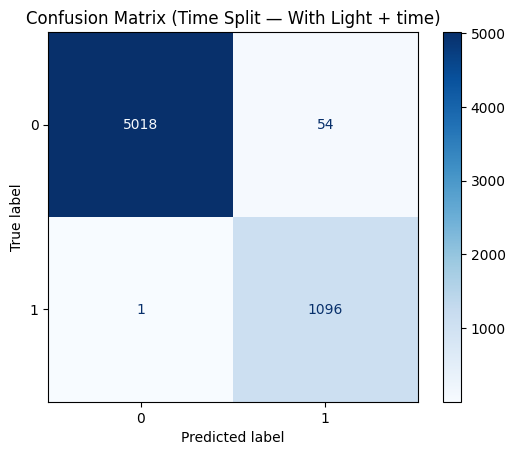

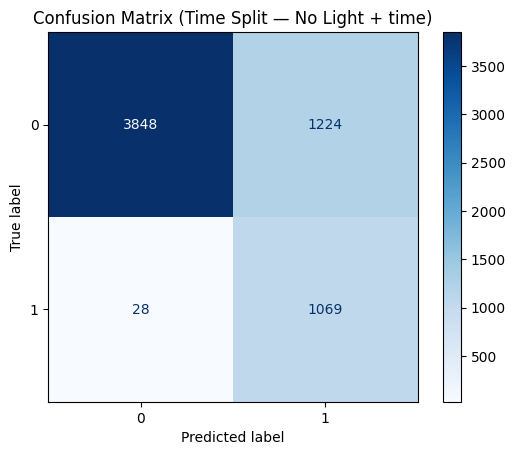

TIME-BASED (WITH LIGHT + time):
    precision    recall  f1-score  support
0   0.991486  0.991084  0.991166   6169.0

TIME-BASED (NO LIGHT + time):
    precision   recall  f1-score  support
0   0.899138  0.79705  0.819287   6169.0


In [ ]:
features_with_light_time    = ['Temperature', 'Humidity', 'CO2', 'Light', 'minutes_sin', 'minutes_cos']
features_without_light_time = ['Temperature', 'Humidity', 'CO2', 'minutes_sin', 'minutes_cos']

res_with_light_time = evaluate_time_split(df, features_with_light_time,  plot_cm=True, label="With Light + time")
res_no_light_time   = evaluate_time_split(df, features_without_light_time, plot_cm=True, label="No Light + time")

print("TIME-BASED (WITH LIGHT + time):\n", res_with_light_time)
print("\nTIME-BASED (NO LIGHT + time):\n",   res_no_light_time)


### CO₂+Light + time and Temp+Light + time:

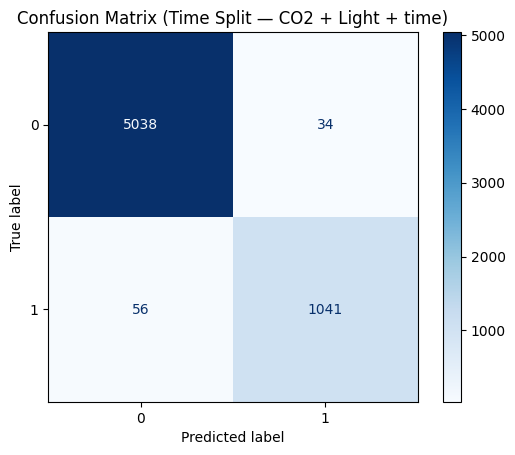

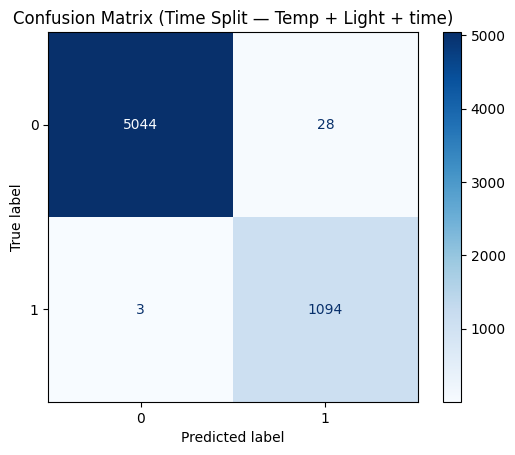


=== Summary ===
                 Model  precision    recall  f1-score  support
0   All + Light + time   0.991486  0.991084  0.991166   6169.0
1      No Light + time   0.899138  0.797050  0.819287   6169.0
2   CO2 + Light + time   0.985337  0.985411  0.985353   6169.0
3  Temp + Light + time   0.995074  0.994975  0.994997   6169.0


In [ ]:
features_co2_light_time  = ['CO2', 'Light', 'minutes_sin', 'minutes_cos']
features_temp_light_time = ['Temperature', 'Light', 'minutes_sin', 'minutes_cos']

res_co2_light_time  = evaluate_time_split(df, features_co2_light_time,  plot_cm=True, label="CO2 + Light + time")
res_temp_light_time = evaluate_time_split(df, features_temp_light_time, plot_cm=True, label="Temp + Light + time")

summary = pd.concat([
    res_with_light_time.assign(Model="All + Light + time"),
    res_no_light_time.assign(Model="No Light + time"),
    res_co2_light_time.assign(Model="CO2 + Light + time"),
    res_temp_light_time.assign(Model="Temp + Light + time"),
], ignore_index=True)[['Model','precision','recall','f1-score','support']]

print("\n=== Summary ===")
print(summary)


### Chech overfitting

In [17]:
time_col = 'date' 

df[time_col] = pd.to_datetime(df[time_col])

df['minute_of_day'] = df[time_col].dt.hour * 60 + df[time_col].dt.minute

minutes_in_day = 24 * 60
df['minutes_sin'] = np.sin(2 * np.pi * df['minute_of_day'] / minutes_in_day)
df['minutes_cos'] = np.cos(2 * np.pi * df['minute_of_day'] / minutes_in_day)

print("Created 'minutes_sin' and 'minutes_cos' columns successfully.")

Created 'minutes_sin' and 'minutes_cos' columns successfully.


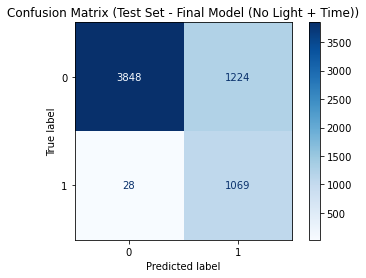

--- Overfitting Check ---
Model: Final Model (No Light + Time)
Train F1 Score: 1.0000
Test F1 Score:  0.8193
Gap (Train-Test): 0.1807


In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


time_col = 'date' 

def evaluate_model_overfitting(df, features, model, time_col, target='Occupancy', train_size=0.7, plot_cm=False, label=""):
  
    df_sorted = df.sort_values(by=time_col)
    n_train = int(len(df_sorted) * train_size)
    train, test = df_sorted.iloc[:n_train], df_sorted.iloc[n_train:]

    X_train, y_train = train[features], train[target]
    X_test,  y_test  = test[features],  test[target]

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    test_report = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)['weighted avg']
    
    y_pred_train = model.predict(X_train)
    train_report = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)['weighted avg']
    
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f"Confusion Matrix (Test Set - {label})")
        plt.show()

    return {
        "model_name": label,
        "train_f1_score": train_report['f1-score'],
        "test_f1_score": test_report['f1-score']
    }


final_model = RandomForestClassifier(random_state=42, n_jobs=-1)

final_features = ['Temperature', 'Humidity', 'CO2', 'minutes_sin', 'minutes_cos']

overfitting_results = evaluate_model_overfitting(
    df=df,
    features=final_features,
    model=final_model,
    time_col=time_col,
    plot_cm=True,
    label="Final Model (No Light + Time)"
)

print("--- Overfitting Check ---")
print(f"Model: {overfitting_results['model_name']}")
print(f"Train F1 Score: {overfitting_results['train_f1_score']:.4f}")
print(f"Test F1 Score:  {overfitting_results['test_f1_score']:.4f}")

gap = overfitting_results['train_f1_score'] - overfitting_results['test_f1_score']
print(f"Gap (Train-Test): {gap:.4f}")